In [183]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("./paper.mplstyle")
from scipy.optimize import curve_fit
from gol import DormantLife
from gol import ALIVE, DORM, DEAD
from util import random_init_grid

# Lifetime Distribution

[1838.58435205  108.33297486]
[497.55598533 106.09091529]


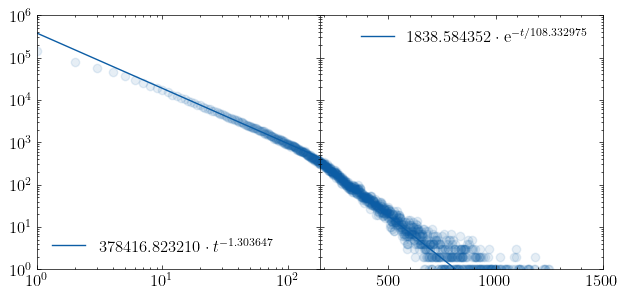

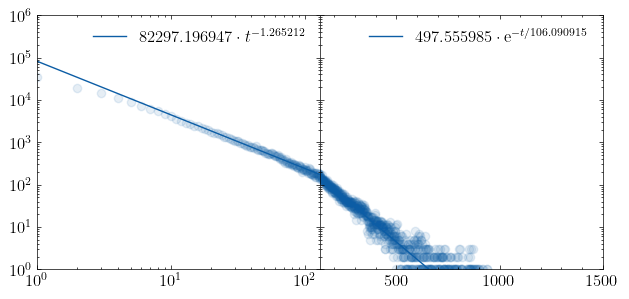

In [122]:
from collections import Counter
from lifetime_distribution import lifetime_distribution

alpha = .2
t_max, t_trans = 10_000, 200

for N, t_divide in zip([100, 50], [180, 130]):
    fig, (axl, axr) = plt.subplots(figsize=(7.3, 3.3), ncols=2, sharey=1)
    fig.subplots_adjust(wspace=0)
    axl.set(
        xscale="log",
        yscale="log",
        xlim=(1,t_divide)
    )
    axr.set(
        yscale="log",
        xlim=(t_divide,1500),
        ylim=(1, 10**6)
    )
    dl = DormantLife(random_init_grid(N, seed=100), alpha=alpha)
    distr: Counter = lifetime_distribution(DORM, dl, t_max, t_trans)
    vals, counts = np.fromiter(distr.keys(), np.intc), np.fromiter(distr.values(), np.intc)

    axl.scatter(vals, counts, alpha=.1)
    # Fit
    fit_func = lambda x, c, gamma: c*x**(-gamma)
    _l_mask = ((vals<t_divide) & (vals>20))
    _l_popt, _ = curve_fit(fit_func, vals[_l_mask], counts[_l_mask], p0=(5000, 1))
    _l_x = np.linspace(1, t_divide)
    axl.plot(_l_x, fit_func(_l_x, *_l_popt), label=r"$%f\cdot t^{-%f}$"%tuple(_l_popt))

    axr.scatter(vals, counts, alpha=.1)
    # Fit
    fit_func = lambda x, c, T: c*np.exp(-x/T)
    _r_mask = (vals>t_divide)
    _r_popt, _ = curve_fit(fit_func, vals[_r_mask], counts[_r_mask], p0=(5000, 60))
    print(_r_popt)
    _r_x = np.linspace(t_divide, 1500)
    axr.plot(_r_x, fit_func(_r_x, *_r_popt), label=r"$%f\cdot\mathrm{e}^{-t/%f}$"%tuple(_r_popt))
    axr.legend()
    axl.legend()

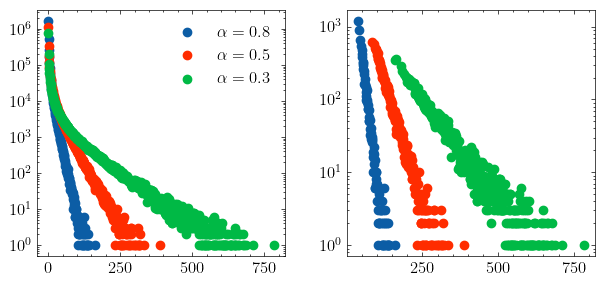

In [153]:
N = 100; t_max = 10_000; t_trans = 200
fig, (ax, axx) = plt.subplots(figsize=(7.2, 3.2), ncols=2)
ax.set(yscale="log")
axx.set(yscale="log")
for alpha in [0.8, 0.5, 0.3]:
    dl = DormantLife(random_init_grid(N, seed=100), alpha=alpha)
    distr: Counter = lifetime_distribution(DORM, dl, t_max, t_trans)
    vals, counts = np.fromiter(distr.keys(), np.intc), np.fromiter(distr.values(), np.intc)
    ax.scatter(vals, counts, label=r"$\alpha = %.1f$"%alpha)
    axx.scatter(vals[int(len(vals)/3):], counts[int(len(vals)/3):])
ax.legend()

In [160]:
# Timescale over alpha
fit_func = lambda x, c, T: c*np.exp(-x/T)
N = 100; t_max = 10_000; t_trans = 200
alphas = np.linspace(0.1, 1, 30)
data = []
for alpha in alphas:
    dl = DormantLife(random_init_grid(N), alpha=alpha)
    distr: Counter = lifetime_distribution(DORM, dl, t_max, t_trans)
    vals, counts = np.fromiter(distr.keys(), np.intc), np.fromiter(distr.values(), np.intc)
    popt, _ = curve_fit(fit_func, vals[int(len(vals)/3):], counts[int(len(vals)/3):], p0=(1000, 100))
    print(alpha, popt, flush=True)
    data.append(popt[1])

0.1 [145.56340308 411.24106678]
0.1310344827586207 [341.1655178  244.98000707]
0.16206896551724137 [772.83063638 163.57231541]
0.19310344827586207 [935.300849   141.19623967]
0.22413793103448276 [1276.19110033  118.53448892]
0.25517241379310346 [2460.83159351   86.88174207]
0.28620689655172415 [2932.76447699   74.44997586]
0.3172413793103448 [3086.63039824   68.9018961 ]
0.34827586206896555 [5449.9816448    51.64401127]
0.3793103448275862 [5750.22019571   47.93053036]
0.41034482758620694 [7925.34794092   40.51720244]
0.4413793103448276 [8586.35864892   37.35461856]
0.4724137931034482 [10755.44665395    32.48321953]
0.503448275862069 [12788.0884478     28.90605683]
0.5344827586206896 [16804.22824963    24.87671947]
0.5655172413793104 [14278.22247171    24.25192186]
0.596551724137931 [17398.00905332    21.24972768]
0.6275862068965516 [1494.74052319    1.86233503]


/Users/daniel/dev/phd/game-of-life-dormancy/venv/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.6586206896551724 [2.00116502e+04 1.80430417e+01]
0.689655172413793 [2.60909443e+04 1.56665516e+01]
0.7206896551724138 [2.35404386e+04 1.49389088e+01]
0.7517241379310344 [3.29819420e+04 1.27284109e+01]
0.7827586206896552 [2.73891993e+04 1.24640400e+01]
0.8137931034482758 [3.79331987e+04 1.07130537e+01]
0.8448275862068965 [3.31562430e+04 1.01832371e+01]
0.8758620689655172 [3.48894516e+04 9.16757811e+00]
0.9068965517241379 [3.13007970e+04 8.44358079e+00]
0.9379310344827586 [4.67221058e+04 6.72489365e+00]
0.9689655172413792 [6.95155881e+04 5.40208433e+00]
1.0 [1.29560915e+05 4.23901250e+00]


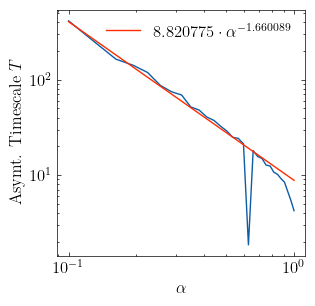

In [164]:
fig, ax = plt.subplots()
ax.set(yscale="log", xscale="log", xlabel=r"$\alpha$", ylabel=r"Asymt. Timescale $T$")
ax.plot(alphas, data)
fit_func = lambda x, c, gamma: c*x**(-gamma)
popt, _ = curve_fit(fit_func, alphas, data)
ax.plot(alphas, fit_func(alphas, *popt), label=r"$%f\cdot \alpha^{-%f}$"%tuple(popt))
ax.legend()

/var/folders/6p/pg8nb3s56dldh08p9t61yss40000gn/T/ipykernel_56423/2809239077.py:6: RuntimeWarning: divide by zero encountered in power
  fit_func = lambda x, c, gamma: c*x**(-gamma)


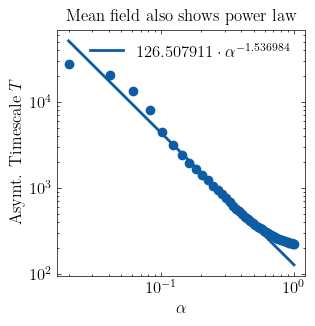

In [266]:
alphas = np.loadtxt("data/dormant-life/time-series/grid-size-100/alpha-range.dat")
p_L_of_alpha = np.array(avgs_t_max_100)/(100*100)
P_3_of_alpha = (p_L_of_alpha)**3 * (1-p_L_of_alpha)**5
fig, ax = plt.subplots()
ax.set(xscale="log", yscale="log", xlabel=r"$\alpha$", ylabel=r"Asymt. Timescale $T$", title="Mean field also shows power law")
fit_func = lambda x, c, gamma: c*x**(-gamma)
popt, _ = curve_fit(fit_func, alphas[alphas>0.1], -1/np.log(1-P_3_of_alpha[alphas>0.1]))
ax.plot(alphas, fit_func(alphas, *popt), label=r"$%f\cdot \alpha^{-%f}$"%tuple(popt))
ax.scatter(alphas, -1/np.log(1-P_3_of_alpha))
ax.legend()

# Mean Field Model

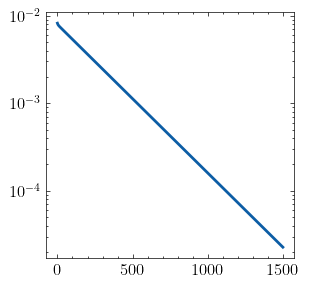

In [275]:
def compute_Q_tau(p_L, alpha, tau_max):
    P_1 = p_L * (1 - p_L)**7
    P_2 = p_L**2 * (1 - p_L)**6
    P_3 = p_L**3 * (1 - p_L)**5
    Q_tau = [p_L*P_1]
    for tau in range(1, tau_max):
        Q_tau.append(Q_tau[-1] * (1 - alpha**tau * P_2 - P_3))
    return Q_tau

alpha = 0.755
p_L = np.mean(load_time_series_data(100, alpha)[:100, 200:t_max])/(100**2)
fig, ax = plt.subplots()
ax.set(yscale="log")
ax.plot(range(1500), compute_Q_tau(p_L, alpha, 1500))

# Extinction Times

In [185]:
def load_extinction_time_data(alpha, cleaned=True):
    base_path = "./data/dormant-life/extinction-time/"
    fname = f"alpha-p{str(alpha)[2:]}.dat"
    data = np.loadtxt(os.path.join(base_path, fname))
    if cleaned:
        return data[data>0]
    return data

def gen_normalized_histogram(data: np.array, bin_min: float, bin_max: float,
                             bin_number: int) -> tuple[np.array, np.array]:
    """
    Generate a normalized histogram from data. Returns tuple with lower
    bin bounds (suitable for bar plot with kw align: "edge") and
    respective probabilities.
    """
    bins = np.arange(bin_min, bin_max, bin_max / bin_number)
    counts, bin_edges = np.histogram(data, bins=bins)
    probs = counts / len(data)
    return bin_edges[:-1], probs

def gen_adap_bin_histrogram(data: np.array,
                            data_per_bin: int,
                            strip_data: bool = True) -> tuple[np.array, np.array]:
    """
    Generate a normalized histogram from data with adaptive binning. Each bin
    holds data_per_bin data points. Therefore, bins are smaller in regions with
    a lot of data and larger in regions with scarce data. Returns tuple with
    center positions of bins (suitable for bar plot with kw align: "center") and
    respective probabilities, given by data_per_bin / bin_widths.
    If strip_data is True, the data is stripped (from the end of the sorted
    data array) to ensure that data fits into bins with data_per_bin data points.
    Note: If strip_data is False, the user has to ensure that the length of data
    fits with data_per_bin.
    """
    sorted_data = np.sort(data)
    bin_number = int(len(sorted_data) / data_per_bin)
    if strip_data:
        strip_idx = bin_number * data_per_bin
        sorted_data = sorted_data[:strip_idx]
    assert len(sorted_data) % data_per_bin == 0
    binned_data = np.reshape(sorted_data, (bin_number, data_per_bin))
    # Positions of bins on x-axis
    means = np.mean(binned_data, axis=1)
    bin_widths = binned_data[:, -1] - binned_data[:, 0]
    # Heights of the bars in bar chart
    probs = 1 / bin_widths
    return means, probs


[0.0110246  0.94937385]
[0.00237684 0.97659002]
[8.29046157e-04 9.42583328e-01]


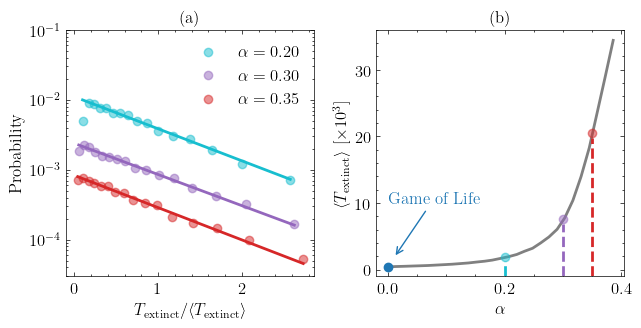

In [227]:
fig, (axl, axr) = plt.subplots(1, 2, figsize=(7.2, 3.2))
### LEFT ###
axl.set(xlabel=r"$T_\mathrm{extinct} / \langle T_\mathrm{extinct} \rangle$",
        title="(a)",
        ylabel="Probability",
        ylim=(3*10**(-5), 1*10**(-1)),
        yscale="log"
        )
alphas = [0.2, 0.3, 0.35]
color_cycle = ["tab:cyan", "tab:purple", "tab:red"]
legend_handles = []
for alpha, c in zip(alphas, color_cycle):
    data = load_extinction_time_data(alpha)
    avg_extinction_time = np.mean(data)
    bin_centers, probs = gen_adap_bin_histrogram(data, 300)
    axl.scatter(bin_centers/avg_extinction_time, probs,
                alpha=.5, label=r"$\alpha = %.2f$"%alpha, color=c)
    # Fit
    fit_func = lambda x, c, tau: c*np.exp(-x/tau)
    popt, _ = curve_fit(fit_func,
                        (bin_centers/avg_extinction_time)[2:], probs[2:])
    print(popt)
    axl.plot(bin_centers/avg_extinction_time,
             fit_func(bin_centers/avg_extinction_time, *popt), color=c)
    label_text = r"$\alpha = %.2f$: $%.3f\cdot\exp(x/%.1f)$"%(alpha, popt[0], popt[1])
    legend_handles.append(mpl.lines.Line2D([],[], c=c, marker="o", label=label_text))
# Legend
axl.legend()
### RIGHT ###
axr.set(xlabel=r"$\alpha$",
        ylabel=r"$\langle T_\mathrm{extinct} \rangle$ $\left[\times 10^3\right]$",
        title="(b)",
        ylim=(-1, 36),
        # yscale="log"
)
alphas = np.loadtxt("./data/dormant-life/extinction-time/alpha-range.dat")
# Data above alpha = 0.4 numerically biased. Extinction times too long.
alphas = alphas[alphas<0.4]
extinction_times = np.array([np.mean(load_extinction_time_data(alpha)) for alpha in alphas])/1000
# axr.plot(-1/np.log(alphas[1:]), extinction_times[1:], color="gray")
axr.plot(alphas, extinction_times, color="gray")
# Draw marker for Game of Life
axr.annotate("Game of Life", (0, extinction_times[0]), xytext=(0., 10),
            arrowprops={"arrowstyle":"->", "relpos":(0.5, 0.5),
                        "color":"tab:blue", "shrinkB":10},
            c="tab:blue")
axr.scatter(x=0, y=extinction_times[0], c="tab:blue", zorder=10)
# Mark alphas from axl
axr.scatter(x=0.2, y=extinction_times[15]-0.1, c="tab:cyan", zorder=10, alpha=0.5)
axr.vlines(0.2, -1, extinction_times[15]-0.6, colors="tab:cyan", linestyles="dashed")
axr.scatter(x=0.3, y=extinction_times[22]-0.15, c="tab:purple", zorder=10, alpha=0.5)
axr.vlines(0.3, -1, extinction_times[22]-0.9, colors="tab:purple", linestyles="dashed")
axr.scatter(x=0.35, y=extinction_times[25]+2.3, c="tab:red", zorder=10, alpha=0.5)
axr.vlines(0.35, -1, extinction_times[25]+1.5, colors="tab:red", linestyles="dashed")
fig.savefig("img/extinction-times.png", bbox_inches="tight")

# Time Series

In [187]:
def load_time_series_data(grid_size, alpha, which: str = "alive"):
    assert which in ("alive", "dorm")
    base_path = f"./data/dormant-life/time-series/grid-size-{grid_size}"
    fname = f"alpha-{str(alpha)[0]}p{str(alpha)[2:]}.dat"
    data = np.loadtxt(os.path.join(base_path, which, fname))
    return data

def average_time_series(time_series_data):
    return np.mean(time_series_data, axis=0)

In [188]:
t_max = 10000
avgs_t_max_20 = []
avgs_t_max_30 = []
avgs_t_max_100 = []
alphas = np.loadtxt("data/dormant-life/time-series/grid-size-100/alpha-range.dat")
for alpha in alphas:
    data_20 = load_time_series_data(20, alpha)
    data_30 = load_time_series_data(30, alpha)
    data_100 = load_time_series_data(100, alpha)
    avgs_t_max_20.append(np.mean(data_20[:100, 200:t_max]))
    avgs_t_max_30.append(np.mean(data_30[:100, 200:t_max]))
    avgs_t_max_100.append(np.mean(data_100[:100, 200:t_max]))

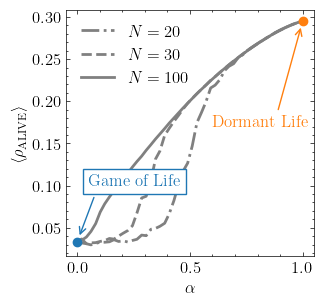

In [228]:
fig, ax = plt.subplots()
alphas = np.loadtxt("data/dormant-life/time-series/grid-size-100/alpha-range.dat")
ax.set(xlabel=r"$\alpha$", ylabel=r"$\langle\rho_\mathrm{ALIVE}\rangle$")
ax.plot(alphas, np.array(avgs_t_max_20)/(20*20), label=r"$N = 20$", linestyle="-.", c="gray")
ax.plot(alphas, np.array(avgs_t_max_30)/(30*30), label=r"$N = 30$", linestyle="--", c="gray")
ax.plot(alphas, np.array(avgs_t_max_100)/(100*100), label=r"$N=100$", linestyle="-", c="gray")
ax.annotate("Game of Life", (0, (np.array(avgs_t_max_100)/(100*100))[0]), xytext=(.05, .1),
            arrowprops={"arrowstyle":"->", "relpos":(0.1, 0.1),
                        "color":"tab:blue", "shrinkB":5},
            c="tab:blue", backgroundcolor="w", bbox={"ec": "tab:blue", "fc": "white"}) # edge color and face color
ax.scatter(x=0, y=(np.array(avgs_t_max_100)/(100*100))[0], c="tab:blue", zorder=10)
ax.annotate("Dormant Life", (1, (np.array(avgs_t_max_100)/(100*100))[-1]), xytext=(.6, .17),
            arrowprops={"arrowstyle":"->", "relpos":(0.65, 0.5),
                        "color":"tab:orange", "shrinkB":5},
            c="tab:orange")
ax.scatter(x=1, y=(np.array(avgs_t_max_100)/(100*100))[-1], c="tab:orange", zorder=10)
ax.legend()
fig.savefig("img/finite-size-effects.png", bbox_inches="tight")

# Transitions

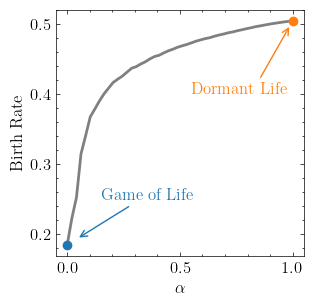

In [229]:
base_path = "data/dormant-life/state-transitions/to-alive-transitions"
alphas = np.loadtxt(os.path.join(base_path, "alpha-range.dat"))
transitions = [np.mean(np.loadtxt(os.path.join(base_path, f"alpha-{str(alpha)[0]}p{str(alpha)[2:]}.dat"))) for alpha in alphas]

birth_rate = transitions/(np.array(avgs_t_max_100))

fig, ax = plt.subplots()
ax.set(xlabel=r"$\alpha$", ylabel=r"Birth Rate")
ax.plot(alphas, birth_rate, c="gray")
ax.annotate("Game of Life", (0, birth_rate[0]), xytext=(.15, .25),
            arrowprops={"arrowstyle":"->", "relpos":(0.5, 0.5),
                        "color":"tab:blue", "shrinkB":10},
            c="tab:blue") # edge color and face color
ax.scatter(x=0, y=birth_rate[0], c="tab:blue", zorder=10)
ax.annotate("Dormant Life", (1, birth_rate[-1]), xytext=(.55, .4),
            arrowprops={"arrowstyle":"->", "relpos":(0.65, 0.5),
                        "color":"tab:orange", "shrinkB":5},
            c="tab:orange")
ax.scatter(x=1, y=birth_rate[-1], c="tab:orange", zorder=10)
fig.savefig("img/birth-rate.png", bbox_inches="tight")

# Old

In [44]:
def DL_alive_cells(grid_size: int, runs: int, t_max: int,
                   alpha: float, base_seed: int = None) -> np.array:
    data = np.zeros((runs, t_max + 1))
    if base_seed is None:
        base_seed = np.random.randint(1)
    for i in range(runs):
        seed = base_seed + i
        rng = np.random.default_rng(seed)
        q = 0.37017384
        init_grid = rng.choice([0, 1], p=[1-q, q], size=[grid_size, grid_size])
        gol = DormantLife(init_grid)
        for j in range(t_max + 1):
            data[i, j] = gol.alive_count
            gol.step(alpha=alpha)
    return data

In [45]:
grid_size = 30
small_grid_size = 14
runs = 100
t_max = 5000
times = np.arange(t_max + 1)
base_seed = 100

In [46]:
data_1 = np.mean(DL_alive_cells(grid_size, runs, t_max, 1, base_seed), axis=0)
data_p75 = np.mean(DL_alive_cells(grid_size, runs, t_max, .75, base_seed), axis=0)
data_p5 = np.mean(DL_alive_cells(grid_size, runs, t_max, .5, base_seed), axis=0)
data_p35 = np.mean(DL_alive_cells(grid_size, runs, t_max, .35, base_seed), axis=0)
data_p25 = np.mean(DL_alive_cells(grid_size, runs, t_max, .25, base_seed), axis=0)
data_p1 = np.mean(DL_alive_cells(grid_size, runs, t_max, .1, base_seed), axis=0)
data_0 = np.mean(DL_alive_cells(grid_size, runs, t_max, 0, base_seed), axis=0)

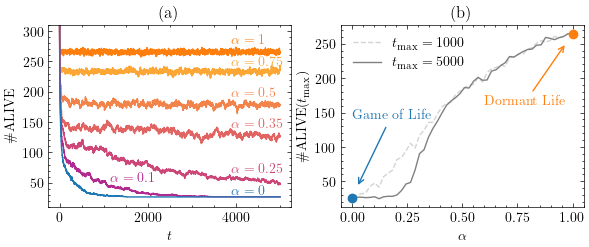

In [78]:
grid_size = 30
small_grid_size = 14
runs = 100
t_max = 5000
times = np.arange(t_max + 1)
base_seed = 100

alphas = [data_1,data_p75,data_p5,data_p35,data_p25,data_p1,data_0]
colors = ["tab:orange",
        *mpl.colormaps["plasma"](np.linspace(0.8, 0.4, 5)),
        "tab:blue"]
label_texts = [r"$\alpha = 1$", r"$\alpha = 0.75$", r"$\alpha = 0.5$",
                r"$\alpha = 0.35$", r"$\alpha = 0.25$", r"$\alpha = 0.1$",
                r"$\alpha = 0$"]
x_offsets = [0, 0, 0, 0, 0, -2750, 0]
y_offsets = [15, 2, 15, 15, 18, 25, 5]

def plot_time_series(ax, x, y, label_text, color, x_offset, y_offset):
    ax.plot(x, y, color=color)
    ax.text(x[-int(len(x)/4.5)]+x_offset, y[-1]+y_offset, label_text,
            color=color)

fig, (axl, axr) = plt.subplots(figsize=(6,3), ncols=2)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.25, hspace=None)
fig.tight_layout()
axl.set(title="(a)", box_aspect=3/4, ylim=(10,310))
axr.set(title="(b)", box_aspect=3/4)
axl.set(xlabel=r"$t$", ylabel=r"$\#\text{ALIVE}$")
for alpha, label_text, color, x_offset, y_offset in zip(alphas,
                                                        label_texts,
                                                        colors,
                                                        x_offsets,
                                                        y_offsets):
    data = alpha
    plot_time_series(axl, times, data, label_text, color, x_offset, y_offset)

alphas, N_alive_t_1000, N_alive_final = np.loadtxt("./data/phase_transition_2.dat")
axr.set(xlabel=r"$\alpha$", ylabel=r"$\#\text{ALIVE}(t_\text{max})$")
axr.plot(alphas, N_alive_t_1000, label=r"$t_\mathrm{max} = 1000$", color="lightgray", linestyle="--")
axr.plot(alphas, N_alive_final, label=r"$t_\mathrm{max} = 5000$", color="gray")
axr.annotate("Game of Life", (0, N_alive_final[0]), xytext=(0., 140),
            arrowprops={"arrowstyle":"->", "relpos":(0.5, 0.5),
                        "color":"tab:blue", "shrinkB":10},
            c="tab:blue")
axr.scatter(x=0, y=N_alive_final[0], c="tab:blue", zorder=10)
axr.annotate("Dormant Life", (1, N_alive_final[-1]), xytext=(.6, 160),
            arrowprops={"arrowstyle":"->", "relpos":(0.5, 0.5),
                        "color":"tab:orange", "shrinkB":10},
            c="tab:orange")
axr.scatter(x=1, y=N_alive_final[-1], c="tab:orange", zorder=10)
axr.legend()
fig.savefig("./img/phase_transition", dpi=500)

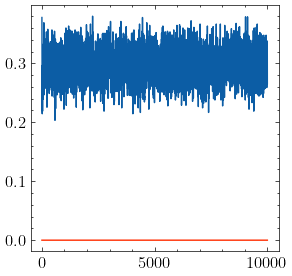

In [268]:
t_max = 10000
alpha = 1
N = 30
q = 0.37017384
init_grid = np.random.choice([0, 1], p=[1-q, q], size=[N, N])
gol = DormantLife(init_grid, alpha=alpha)
data = np.zeros(t_max)
while gol.t < t_max:
    data[gol.t] = gol.count_state(1)
    gol.step()
fig, ax = plt.subplots()
ax.plot(np.arange(t_max), data/N**2)
ax.plot(np.arange(t_max), [0]*t_max)
# ax.set(xlim=(8000,10000))